# Shack Labs Project 1 writeup .

### Predicting housing prices > This model we would try to predict the target with the help of Linear regression by using Gradient decent model  ###

In [1]:
#importing the necessary libraries to complete the assignment 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset 
df = pd.read_csv("DS - Assignment Part 1 data set.csv")

In [3]:
# analysis of the DS 
df.head()


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
Transaction date                            414 non-null float64
House Age                                   414 non-null float64
Distance from nearest Metro station (km)    414 non-null float64
Number of convenience stores                414 non-null int64
latitude                                    414 non-null float64
longitude                                   414 non-null float64
Number of bedrooms                          414 non-null int64
House size (sqft)                           414 non-null int64
House price of unit area                    414 non-null float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
# To check if there are any null values in any of the column.
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
# observation from the data set 
# transaction date dose not look proper ,we can extract year out of it by converting the column Datatype to Date but it seems
# transaction date might not contribute much to the overall prediction ,hence can be dropped. 
df.drop('Transaction date',axis = 1,inplace=True)  # dropping the Transaction date column 


In [8]:
# unit area value is given hence create a new column to calculate the final price of the house in Dataset 
df['Total Value'] = df['House size (sqft)'] * df['House price of unit area']

In [9]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Total Value
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1


In [10]:
df.corr() 

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Total Value
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567,-0.198741
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613,-0.441094
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005,0.381169
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307,0.378440
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287,0.346538
Number of bedrooms,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265,0.548679
House size (sqft),-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489,0.702782
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000,0.698585
Total Value,-0.198741,-0.441094,0.381169,0.378440,0.346538,0.548679,0.702782,0.698585,1.000000


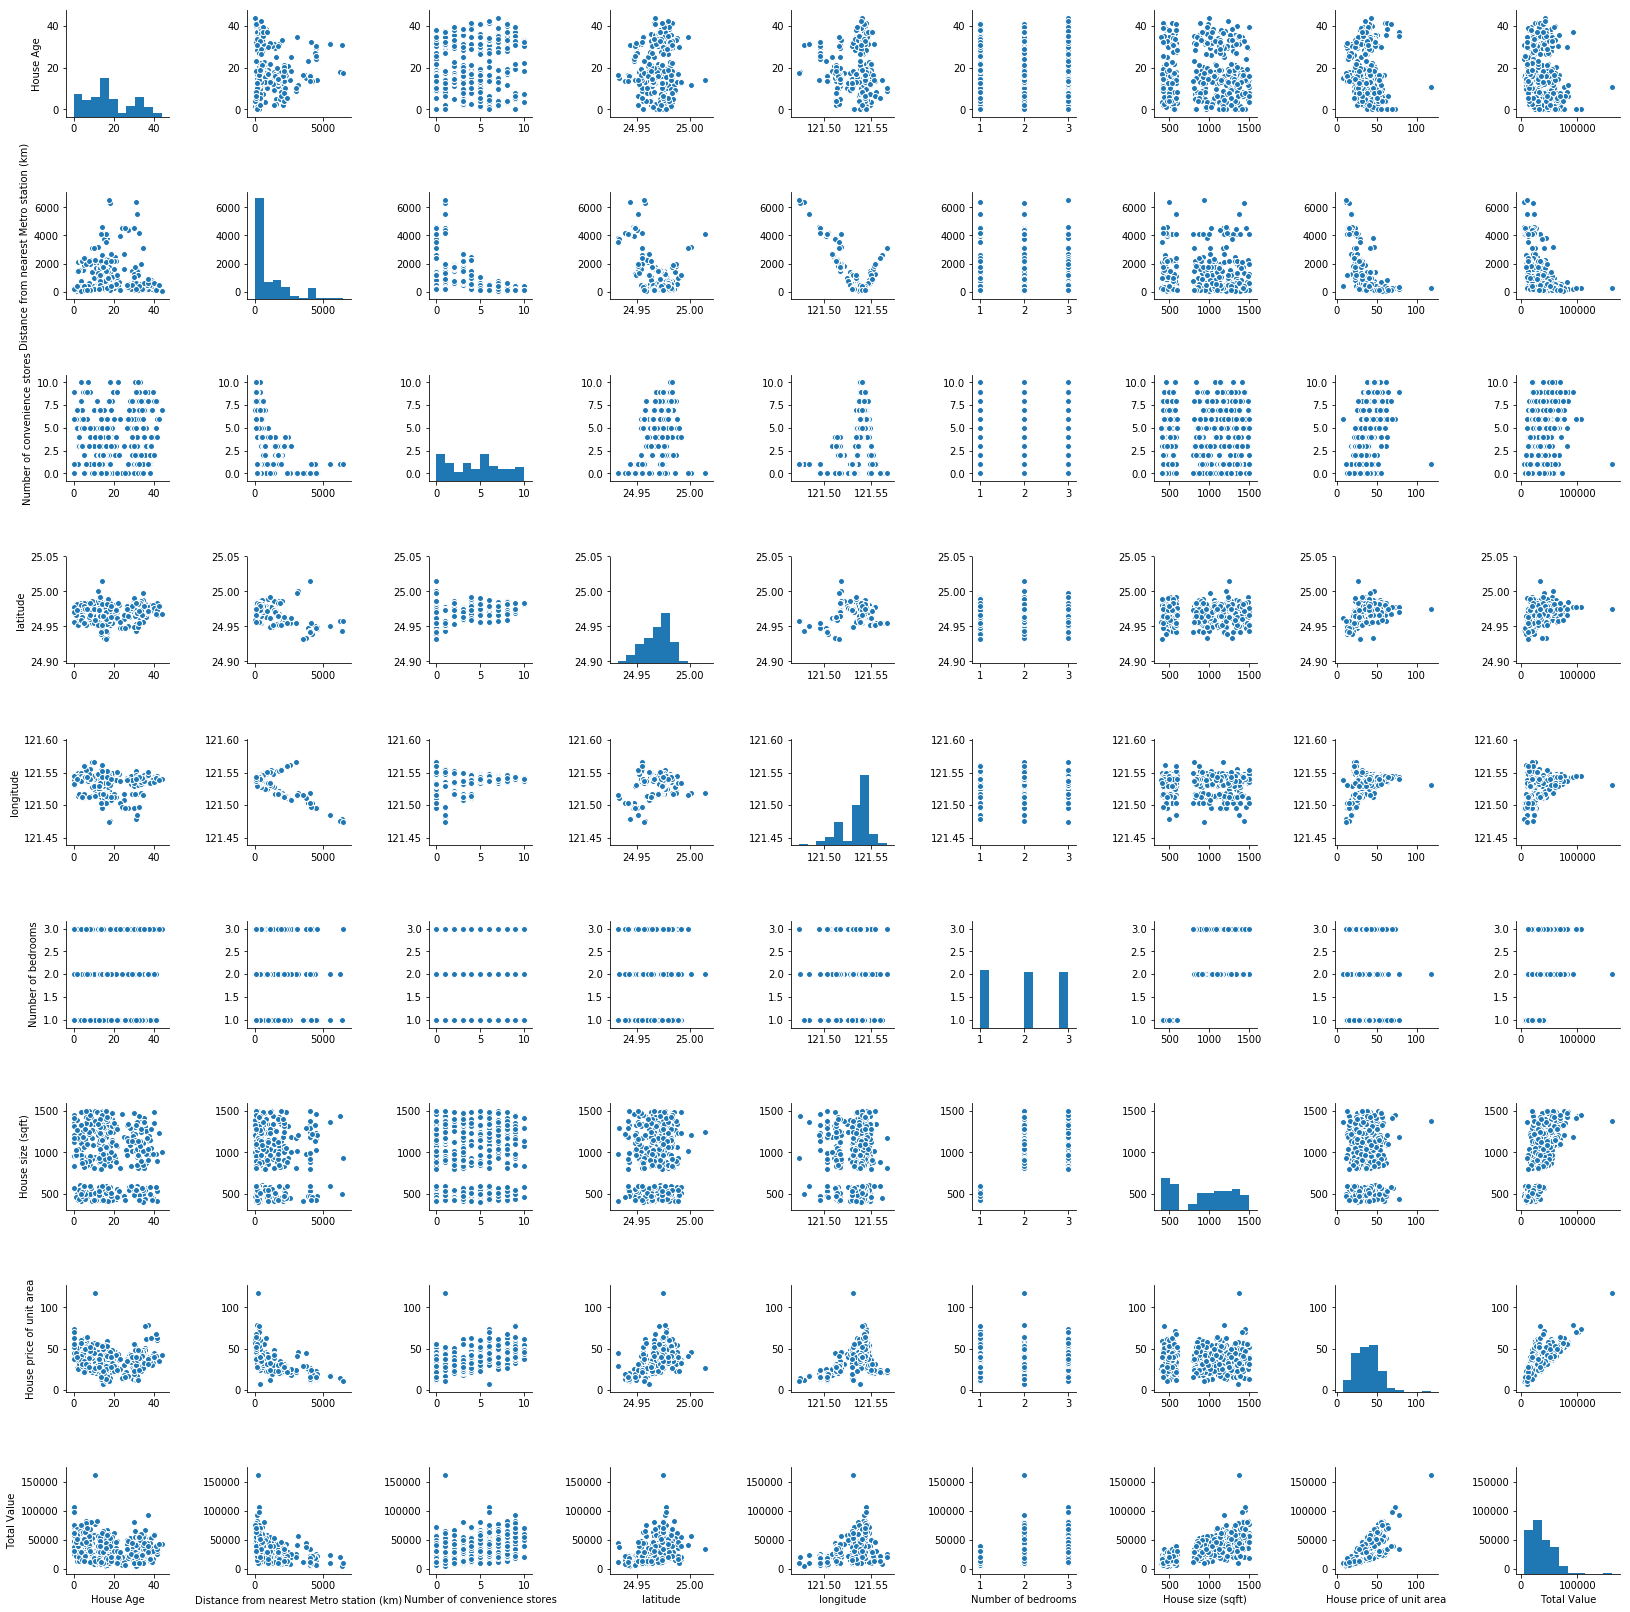

In [11]:
sns.pairplot(df)
plt.show()

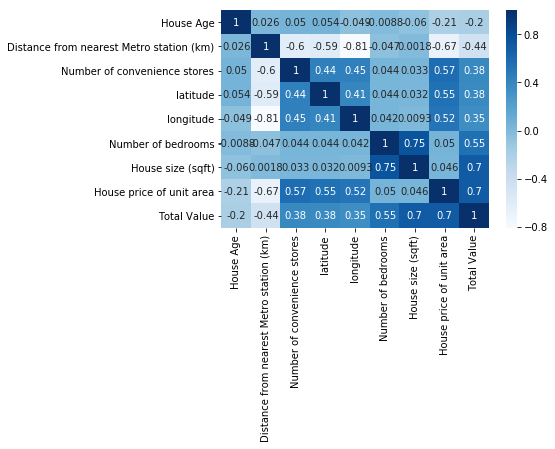

In [12]:
#using coorelation as measure between Various input features and prediction values to consider the same for the model 
sns.heatmap(df.corr(),annot=True,cmap ='Blues')
plt.show()

### Model features consideration ###

In [178]:

# As mentioned before Coorelation helps to determine if there is a strong relationship exist between input feature and prediction 
# from the above graph there are two observations

#1 . Considering House price of unit area only there are three input features which are worth looking 
# a . Number of convenience store ,b.Latitude ,c.Longitude
# however if we use total value as parameter latitutde and longitude fares less compare to number of bedrooms and house size . For 
# we would all 5 as our input feature 
#input feature
#a.Number of convenience store
#b.Latitude 
#c.Longitude
#d.Number of bedrooms
#.House size 


### Training a Linear Regression Model ###

In [13]:
X = df[['Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)']]
y = df['Total Value']

## Split the data set ##

In [180]:
#from sklearn.model_selection import train_test_split

In [181]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

## Creating and Training the Model ##

In [17]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [24]:
sgdr = SGDRegressor(max_iter=1000)
model = sgdr.fit(X_norm, y)
print(model)
print(f"number of iterations completed: {model.n_iter_}, number of weight updates: {model.t_}")

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
number of iterations completed: 1000, number of weight updates: 414001.0


In [53]:
sgdr = SGDRegressor(max_iter=500)
model_1 = sgdr.fit(X_norm, y)
print(model_1)
print(f"number of iterations completed: {model_1.n_iter_}, number of weight updates: {model.t_}")

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=500, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
number of iterations completed: 500, number of weight updates: 414001.0


In [28]:
b_norm = model.intercept_
w_norm = model.coef_

print (b_norm)
print(w_norm)

[ 35602.97353432]
[  3814.23927194   3973.58972674   3380.68354426    292.92656734
  13450.33647868]


In [54]:
b_norm_1 = model_1.intercept_
w_norm_1 = model_1.coef_

print (b_norm_1)
print(w_norm_1)

[ 35596.39554892]
[  3831.77966282   4003.61019498   3403.75575968    321.53016851
  13465.42832185]


### Prediction from model

In [31]:
predictions = model.predict(X_norm)

Text(0,0.5,'Predictions')

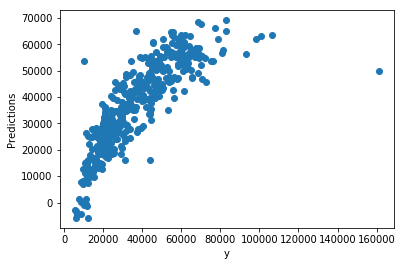

In [33]:
plt.scatter(y,predictions)
#plt.plot(X_test,predictions,c='r')
plt.xlabel("y")
plt.ylabel("Predictions")

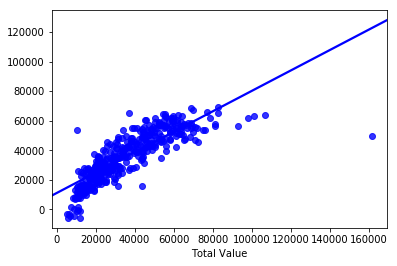

In [34]:
sns.regplot(x=y,y=predictions,ci=None,color ='blue');

In [55]:
predictions_1 = model_1.predict(X_norm)

Text(0,0.5,'Predictions')

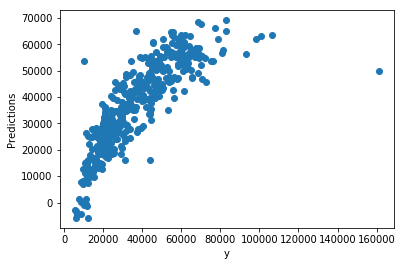

In [56]:
plt.scatter(y,predictions)
#plt.plot(X_test,predictions,c='r')
plt.xlabel("y")
plt.ylabel("Predictions")

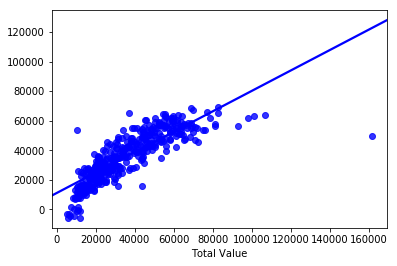

In [57]:
sns.regplot(x=y,y=predictions,ci=None,color ='blue');

### Regression Evaluation Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
Mean Squared Error (MSE) is the mean of the squared errors:
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:


In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 7407.6190773
MSE: 121414020.04
RMSE: 11018.8030221


In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, predictions_1))
print('MSE:', metrics.mean_squared_error(y, predictions_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions_1)))

MAE: 7408.89869422
MSE: 121413672.861
RMSE: 11018.7872681


R-squared we can use to measure the performance of our regression model. It represents 
how close the data points are to the regression line. The higher the R-squared value, the better the model fits your data. 
The best possible score is 1.0 and it can be negative as well .

In [40]:
from sklearn.metrics import r2_score

In [41]:
print("R2-score: %.2f" % r2_score(y , predictions) )

R2-score: 0.69


In [58]:
print("R2-score: %.2f" % r2_score(y , predictions_1) )

R2-score: 0.69


In [59]:
# Below is the dataset to compare the observation and prediction result side by side . 
dataset = {'Observation':y,'Result':predictions}
result_dataset = pd.DataFrame(data=dataset)
result_dataset.head(10)

,Observation,Result
0,21792.5,35136.386891
1,52328.0,58857.216367
2,50138.0,50335.041885
3,47950.0,42836.593804
4,21162.1,24742.052642
5,26578.8,24043.978912
6,44934.5,50792.617276
7,61457.2,58895.807572
8,11054.4,1426.185913
9,23757.5,35096.406887


In [108]:
# define function to find the iteration value of SGD to understand if the loss or cost function can be improved further . 
a = np.arange (100,50000,1000)
for i in a :
    sgdr = SGDRegressor(max_iter=i) 
    model= sgdr.fit(X_norm,y)
    #print(model)
    print(f"number of iterations completed: {model.n_iter_}, number of weight updates: {model.t_}")
    prediction_norm = model.predict(X_norm)
    print("R2-score: %.2f" % r2_score(y , prediction_norm) )

number of iterations completed: 100, number of weight updates: 41401.0
R2-score: 0.69
number of iterations completed: 1100, number of weight updates: 455401.0
R2-score: 0.69
number of iterations completed: 2100, number of weight updates: 869401.0
R2-score: 0.69
number of iterations completed: 3100, number of weight updates: 1283401.0
R2-score: 0.69
number of iterations completed: 4100, number of weight updates: 1697401.0
R2-score: 0.69
number of iterations completed: 5100, number of weight updates: 2111401.0
R2-score: 0.69
number of iterations completed: 6100, number of weight updates: 2525401.0
R2-score: 0.69
number of iterations completed: 7100, number of weight updates: 2939401.0
R2-score: 0.69
number of iterations completed: 8100, number of weight updates: 3353401.0
R2-score: 0.69
number of iterations completed: 9100, number of weight updates: 3767401.0
R2-score: 0.69
number of iterations completed: 10100, number of weight updates: 4181401.0
R2-score: 0.69
number of iterations comp

The model shows clearly that R2 score not improving beyond .69. Hence with the current set of feature we won't be able to go beyond the same . Below we will now try model recaliberation after try eliminate certain feature with the help of OLS method . 

#### Model recaliberation 

Idea here is now to use Backward elimination methond by using OLS method in Statsmodel . The Statistical significant value we are
trying to determine here which we can keep in the model and then to find the insignificant attributes or features we can drop
without effecting the R2 . 

Below is where we call the stats model library . 

In [109]:
# Reading the dataset 
df_new = pd.read_csv("DS - Assignment Part 1 data set.csv")

In [110]:
# unit area value is given hence create a new column to calculate the final price of the house in Dataset 
df_new['Total Value'] = df_new['House size (sqft)'] * df_new['House price of unit area']

In [125]:
X = df_new[['Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)']]
y = df_new['Total Value']

In [126]:
import statsmodels.formula.api as sm 
#np.append(arr = np.ones((414,1)).astype(int), values = X, axis = 1)

In [127]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()

The result here is to check the Alpha value which we are keeping as .05 if it is greater or lower than the pvalue . 
If the value is greater than p value we can drop those attributes since those are statistically insignificant . 

In [128]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            Total Value   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     911.8
Date:                Sat, 14 Jan 2023   Prob (F-statistic):          3.33e-219
Time:                        19:32:27   Log-Likelihood:                -4465.4
No. Observations:                 414   AIC:                             8941.
Df Residuals:                     409   BIC:                             8961.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Number of conven

From the above model it looks like only number of bedrooms column is slightly ahead of its p value . I believe we can 
try optimizing the model by dropping the same . 

In [115]:
#input feature
#a.Number of convenience store
#b.Latitude    
#c.Longitude    
#.House size 

In [130]:
X = df[['Number of convenience stores', 'latitude', 'longitude',
        'House size (sqft)']]

y = df['Total Value']

In [131]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()
X_norm_1 = scaler.fit_transform(X)

In [134]:
# define function to find the iteration value of SGD to understand if the loss or cost function can be improved further . 
a = np.arange (100,5000,1000)
for i in a :
    sgdr_1 = SGDRegressor(max_iter=i) 
    model_1= sgdr_1.fit(X_norm_1,y)
    #print(model_1)
    print(f"number of iterations completed: {model_1.n_iter_}, number of weight updates: {model_1.t_}")
    prediction_norm = model_1.predict(X_norm_1)
    print("R2-score: %.2f" % r2_score(y , prediction_norm) )

number of iterations completed: 100, number of weight updates: 41401.0
R2-score: 0.69
number of iterations completed: 1100, number of weight updates: 455401.0
R2-score: 0.69
number of iterations completed: 2100, number of weight updates: 869401.0
R2-score: 0.69
number of iterations completed: 3100, number of weight updates: 1283401.0
R2-score: 0.69
number of iterations completed: 4100, number of weight updates: 1697401.0
R2-score: 0.69


Considering the R2 it seems even with dropping of the features .69 is the best we can come up with the said dataset..Hence to conclude regression model with SGD below feature is our best bet with a R2 score of .69 .  


#input feature
#a.Number of convenience store
#b.Latitude 
#c.Longitude
#d.Number of bedrooms
#.House size 